In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
df = pd.read_csv('Bot_lane.csv')
lane = df.drop(columns = ['Lane', 'Unnamed: 0', 'Summoner', 'Item_0', 'Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6'])

In [4]:
lane.head()

,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
0,99,6,0,24,6,1,15582,4590,2697,7712,10457,14,8,60,57
1,15,9,1,10,8,2,17915,17862,9714,12337,12963,14,2,23,0
2,498,3,5,5,2,1,11968,5871,2456,15877,8925,11,2,27,6
3,25,0,7,10,0,0,11120,1821,1201,19085,8150,13,11,57,43
4,350,3,2,28,2,1,14093,9959,1260,8601,9166,13,8,51,30


In [5]:
lane.groupby('Champion').mean().head()

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
Champion,,,,,,,,,,,,,,
1,4.727273,6.863636,9.545455,1.954545,1.090909,13786.636364,3954.136364,2059.272727,15118.454545,9807.727273,13.318182,2.454545,37.045455,24.772727
3,2.109145,6.554572,12.386431,0.728614,0.870206,8024.837758,2053.283186,1070.265487,20641.126844,7742.766962,12.324484,7.463127,50.386431,33.926254
4,4.130435,5.869565,7.086957,2.000000,1.282609,12576.760870,5403.739130,2955.913043,18416.282609,10548.782609,12.717391,3.304348,25.847826,29.304348
5,10.333333,7.000000,9.333333,4.000000,2.333333,17596.333333,18372.666667,1330.666667,27699.000000,11266.666667,13.000000,4.666667,36.666667,28.000000
6,5.200000,6.000000,5.800000,2.800000,2.000000,12105.200000,15691.600000,4346.400000,25399.000000,11656.400000,15.400000,0.800000,18.000000,17.000000


In [6]:
model = KMeans(n_clusters = 4).fit(lane)

In [7]:
model.cluster_centers_

array([[1.68803019e+02, 4.54081208e+00, 7.25169183e+00, 1.17265487e+01,
        1.93133784e+00, 1.29578345e+00, 1.56653577e+04, 4.09494742e+03,
        1.89562952e+03, 2.09357502e+04, 1.09220716e+04, 1.40297241e+01,
        5.07522124e+00, 4.39897970e+01, 2.61285268e+01],
       [1.32347377e+02, 1.17023847e+01, 6.53449921e+00, 1.12403816e+01,
        5.12034976e+00, 2.10763116e+00, 3.61915291e+04, 2.19495060e+04,
        7.20790859e+03, 2.51413814e+04, 1.74571091e+04, 1.66310016e+01,
        2.43640700e+00, 3.19906200e+01, 1.77062003e+01],
       [1.80384249e+02, 2.30464306e+00, 4.73171465e+00, 9.68588539e+00,
        1.06419605e+00, 9.64945250e-01, 8.30453775e+03, 2.85473156e+03,
        1.54186126e+03, 1.17522109e+04, 7.83444150e+03, 1.17631612e+01,
        5.09980205e+00, 3.89507379e+01, 2.16244957e+01],
       [1.34986358e+02, 7.65229254e+00, 4.00818492e+00, 8.97635468e+00,
        4.28776052e+00, 1.77787041e+00, 1.95322984e+04, 1.67896651e+04,
        6.95275794e+03, 1.50330124e+0

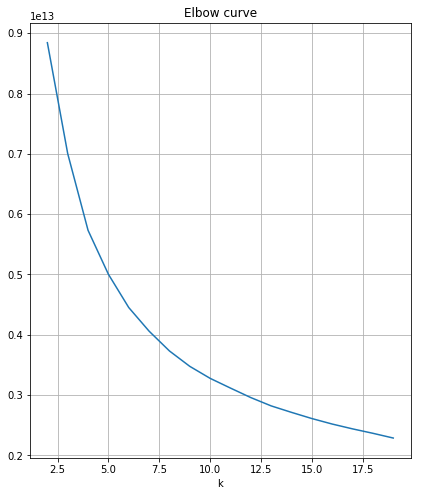

In [8]:
distorsions = []

for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(lane)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 20), distorsions)
plt.grid(True)

In [9]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(lane)
    silhouette_avg = metrics.silhouette_score(lane, cluster_labels)
    silhouette_plot.append(silhouette_avg)

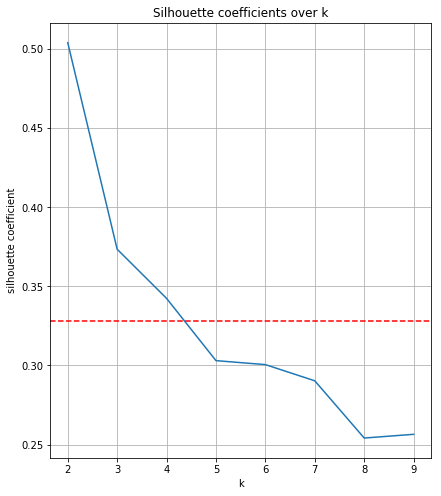

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [11]:
k_means = KMeans(n_clusters = 5).fit(lane.groupby('Champion').mean())
cluster_assignments = k_means.predict(lane.groupby('Champion').mean())

In [12]:
cluster_assignments

array([0, 0, 0, 3, 4, 0, 3, 0, 0, 4, 0, 1, 4, 1, 0, 1, 1, 4, 1, 1, 2, 1,
       0, 0, 4, 3, 1, 1, 3, 0, 0, 4, 0, 4, 0, 4, 4, 0, 3, 1, 0, 0, 1, 0,
       3, 1, 0, 0, 0, 4, 3, 0, 1, 1, 0, 1, 4, 1, 4, 1, 1, 0, 4, 2, 0, 0,
       0, 1, 4, 1, 3, 1, 2, 0, 1, 4, 1, 1, 0, 0, 1, 0, 0, 0, 4, 4, 4, 1,
       0, 1, 4, 4, 1, 0, 1, 2, 4, 4, 1, 4, 1, 1, 1, 1, 2, 1, 0, 1, 3, 4,
       1, 1, 1, 4, 0, 1, 0, 1, 0, 1, 1, 3, 4, 1, 3, 0, 1, 0, 0, 3, 3, 4,
       1, 0, 0, 1, 0, 4, 1, 0], dtype=int32)

In [13]:
clustered = lane.groupby('Champion').mean()

In [14]:
clustered['Cluster'] = cluster_assignments

In [15]:
clustered

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Cluster
Champion,,,,,,,,,,,,,,,
1,4.727273,6.863636,9.545455,1.954545,1.090909,13786.636364,3954.136364,2059.272727,15118.454545,9807.727273,13.318182,2.454545,37.045455,24.772727,0
3,2.109145,6.554572,12.386431,0.728614,0.870206,8024.837758,2053.283186,1070.265487,20641.126844,7742.766962,12.324484,7.463127,50.386431,33.926254,0
4,4.130435,5.869565,7.086957,2.000000,1.282609,12576.760870,5403.739130,2955.913043,18416.282609,10548.782609,12.717391,3.304348,25.847826,29.304348,0
5,10.333333,7.000000,9.333333,4.000000,2.333333,17596.333333,18372.666667,1330.666667,27699.000000,11266.666667,13.000000,4.666667,36.666667,28.000000,3
6,5.200000,6.000000,5.800000,2.800000,2.000000,12105.200000,15691.600000,4346.400000,25399.000000,11656.400000,15.400000,0.800000,18.000000,17.000000,4
7,4.750000,6.000000,7.000000,2.000000,1.000000,12390.750000,2650.375000,1537.500000,15242.000000,8750.375000,12.500000,2.125000,21.250000,12.000000,0
8,6.035294,5.494118,6.882353,3.000000,1.505882,21779.623529,6435.882353,3288.847059,29003.282353,11723.411765,14.152941,2.588235,19.811765,3.964706,3
9,2.900277,6.986150,10.789474,1.030471,1.063712,11335.387812,2615.731302,1154.019391,14340.099723,8126.576177,11.988920,6.867036,54.454294,84.390582,0
10,2.666667,5.833333,9.833333,1.000000,1.250000,8504.583333,4065.416667,2688.250000,17608.666667,8301.166667,12.166667,3.333333,39.083333,8.916667,0
